## Çubuk Grafikler
Tahmini süre: 30 dakika

Bu laboratuvar çalışmasında, verileri görselleştirmeye odaklanacaksınız.

Veri seti size bir RDBMS (İlişkisel Veritabanı Yönetim Sistemi) biçiminde sağlanacaktır.

Gerekli verileri çıkarmak için SQL sorguları kullanacaksınız.

Hedefler
Bu laboratuvar çalışmasında şunları gerçekleştireceksiniz:

Verilerin dağılımını görselleştirme

İki özellik arasındaki ilişkiyi görselleştirme

Verilerin bileşimini görselleştirme

Verilerin karşılaştırmasını görselleştirme

Kurulum: Veritabanı ile Çalışma
Gerekli kütüphaneleri yükleyin

In [33]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

In [34]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

--2026-01-30 14:25:12--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
169.63.118.104ourses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  57.0MB/s    in 2.7s    

2026-01-30 14:25:15 (57.0 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



In [35]:
# Load the data
df = pd.read_csv("survey-data.csv")
pd.set_option('display.max_columns', None)
# Display the first few rows to understand the structure of the data
df.head(5)

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

## Soru 1: Veri Dağılımlarını Görselleştirme
***1. Yıllık Ücretin (ConvertedCompYearly) Histogramı***
Yıllık ücretin (ConvertedCompYearly) dağılımını bir histogram kullanarak görselleştirin.

In [51]:
# Veritabanını belleğe yükleyelim
conn = sqlite3.connect(':memory:')
df.to_sql('survey_table', conn, index=False, if_exists='replace')

65437

1.0
16256603.0


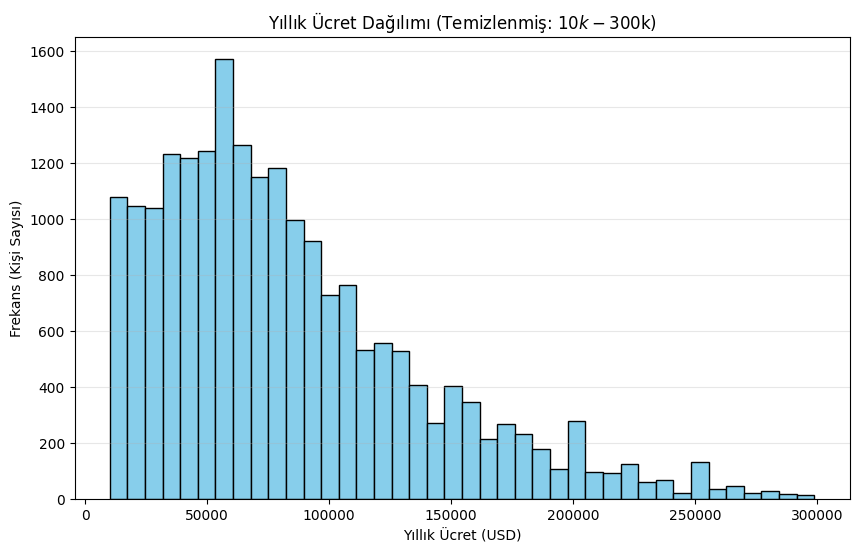

In [52]:
print(df['ConvertedCompYearly'].min())
print(df['ConvertedCompYearly'].max())

# SQL ile sadece gerçekçi maaş aralığını çek ($10k - $300k)
query_comp = """
SELECT ConvertedCompYearly 
FROM survey_table 
WHERE ConvertedCompYearly > 10000 AND ConvertedCompYearly < 300000
"""
df_comp = pd.read_sql_query(query_comp, conn)

plt.figure(figsize=(10, 6))
plt.hist(df_comp['ConvertedCompYearly'], bins=40, color='skyblue', edgecolor='black')
plt.title('Yıllık Ücret Dağılımı (Temizlenmiş: $10k - $300k)')
plt.xlabel('Yıllık Ücret (USD)')
plt.ylabel('Frekans (Kişi Sayısı)')
plt.grid(axis='y', alpha=0.3)
plt.show()

***2. Yaşın Kutu Grafiği***

Yaş veri setinde kategorik bir değişken olduğundan, kutu grafiği için sayısal değerlere dönüştürün.

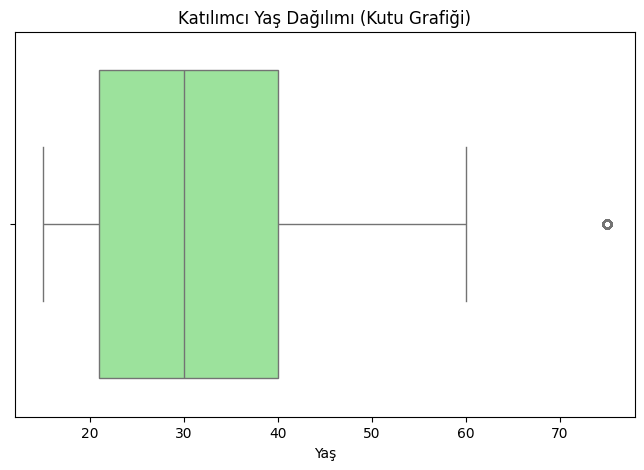

In [38]:
# SQL ile Yaş kategorilerini sayısal merkeze çek
query_age_box = """
SELECT 
    CASE 
        WHEN Age = 'Under 18 years old' THEN 15
        WHEN Age = '18-24 years old' THEN 21
        WHEN Age = '25-34 years old' THEN 30
        WHEN Age = '35-44 years old' THEN 40
        WHEN Age = '45-54 years old' THEN 50
        WHEN Age = '55-64 years old' THEN 60
        WHEN Age = '65 years or older' THEN 75
    END AS Age_Numerical
FROM survey_table
WHERE Age_Numerical IS NOT NULL
"""
df_age_box = pd.read_sql_query(query_age_box, conn)

plt.figure(figsize=(8, 5))
sns.boxplot(x=df_age_box['Age_Numerical'], color='lightgreen')
plt.title('Katılımcı Yaş Dağılımı (Kutu Grafiği)')
plt.xlabel('Yaş')
plt.show()

## Görev 2: Verilerdeki İlişkileri Görselleştirme
***1. Yaş (sayısal) ve DönüştürülenYıllıkÜcretin Dağılım Grafiği***

Yaş ve ücret arasındaki ilişkiyi inceleyin.

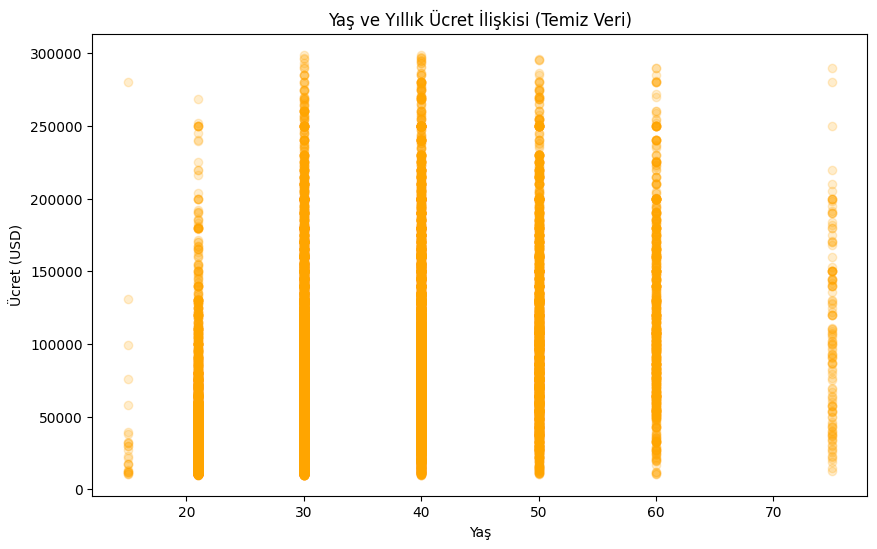

In [39]:
# SQL ile hem yaş dönüşümünü yap hem de maaşı filtrele
query_scatter = """
SELECT 
    CASE 
        WHEN Age = 'Under 18 years old' THEN 15
        WHEN Age = '18-24 years old' THEN 21
        WHEN Age = '25-34 years old' THEN 30
        WHEN Age = '35-44 years old' THEN 40
        WHEN Age = '45-54 years old' THEN 50
        WHEN Age = '55-64 years old' THEN 60
        WHEN Age = '65 years or older' THEN 75
    END AS Age_Numerical,
    ConvertedCompYearly
FROM survey_table
WHERE Age_Numerical IS NOT NULL 
  AND ConvertedCompYearly > 10000 
  AND ConvertedCompYearly < 300000
"""
df_scatter = pd.read_sql_query(query_scatter, conn)

plt.figure(figsize=(10, 6))
plt.scatter(df_scatter['Age_Numerical'], df_scatter['ConvertedCompYearly'], alpha=0.2, color='orange')
plt.title('Yaş ve Yıllık Ücret İlişkisi (Temiz Veri)')
plt.xlabel('Yaş')
plt.ylabel('Ücret (USD)')
plt.show()

***2. Yaş_sayısal Değerini Balon Boyutu Olarak Kullanarak ConvertedCompYearly ve JobSatPoints_6'nın Balon Grafiği***

Yaşın balon boyutu olarak kullanıldığı bu grafikte, ücret ve iş memnuniyetinin nasıl ilişkili olduğu incelenir.

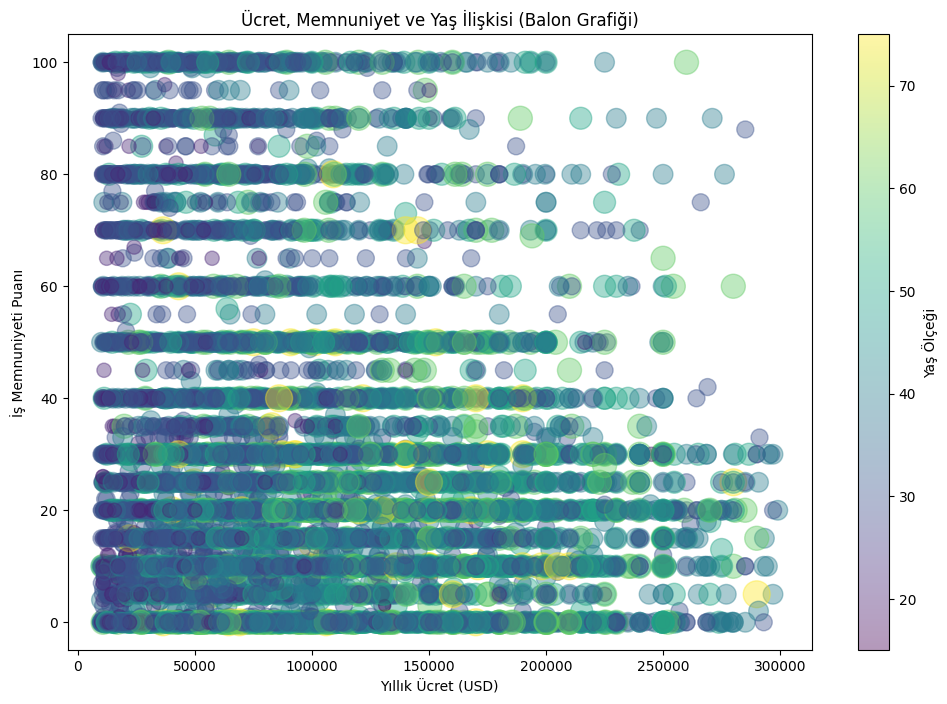

In [40]:
# SQL ile üçlü seti temizlenmiş olarak çek
query_bubble = """
SELECT 
    ConvertedCompYearly, 
    JobSatPoints_6, 
    CASE 
        WHEN Age = 'Under 18 years old' THEN 15
        WHEN Age = '18-24 years old' THEN 21
        WHEN Age = '25-34 years old' THEN 30
        WHEN Age = '35-44 years old' THEN 40
        WHEN Age = '45-54 years old' THEN 50
        WHEN Age = '55-64 years old' THEN 60
        WHEN Age = '65 years or older' THEN 75
    END AS Age_Size
FROM survey_table
WHERE ConvertedCompYearly > 10000 
  AND ConvertedCompYearly < 300000
  AND JobSatPoints_6 IS NOT NULL
"""
df_bubble = pd.read_sql_query(query_bubble, conn)

plt.figure(figsize=(12, 8))
plt.scatter(df_bubble['ConvertedCompYearly'], 
            df_bubble['JobSatPoints_6'], 
            s=df_bubble['Age_Size'] * 5, 
            alpha=0.4, 
            c=df_bubble['Age_Size'], 
            cmap='viridis')

plt.title('Ücret, Memnuniyet ve Yaş İlişkisi (Balon Grafiği)')
plt.xlabel('Yıllık Ücret (USD)')
plt.ylabel('İş Memnuniyeti Puanı')
plt.colorbar(label='Yaş Ölçeği')
plt.show()

# Görev 3: Veri Bileşiminin Çubuk Grafiklerle Görselleştirilmesi

***1. Ana Şube Dağılımının Yatay Çubuk Grafiği***
Katılımcıların birincil rollerinin dağılımını görselleştirerek mesleki odaklarını anlayın.

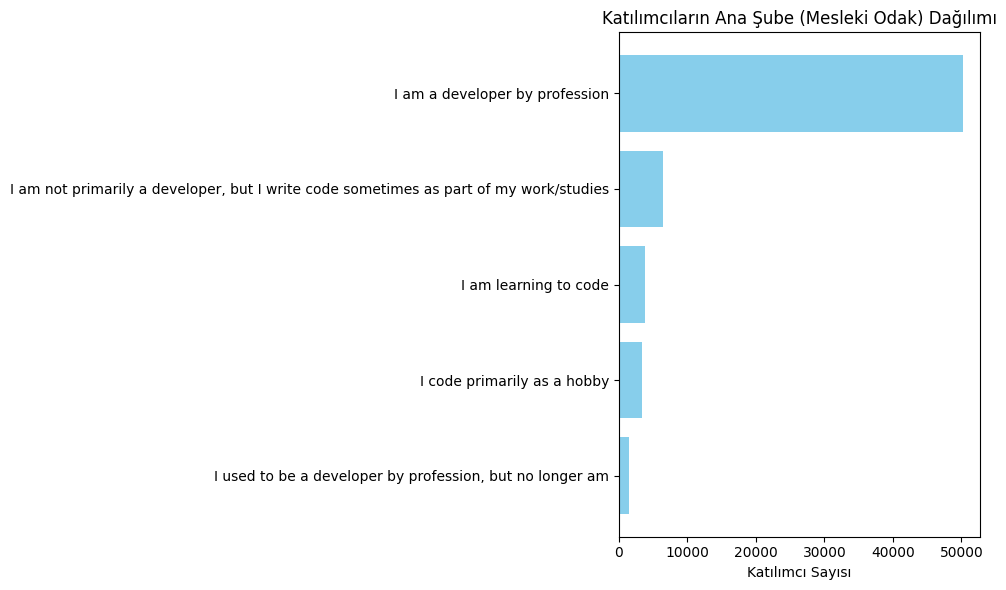

In [41]:
# SQL ile Ana Şube verilerini çek
query_branch = "SELECT MainBranch, COUNT(*) as Count FROM survey_table GROUP BY MainBranch ORDER BY Count ASC"
df_branch = pd.read_sql_query(query_branch, conn)

plt.figure(figsize=(10, 6))
plt.barh(df_branch['MainBranch'], df_branch['Count'], color='skyblue')
plt.title('Katılımcıların Ana Şube (Mesleki Odak) Dağılımı')
plt.xlabel('Katılımcı Sayısı')
plt.tight_layout()
plt.show()

***2. Katılımcıların Çalışmak İstediği En İyi 5 Programlama Dilinin Dikey Çubuk Grafiği***

LanguageWantToWorkWith anketine göre en çok istenen programlama dillerini belirleyin.

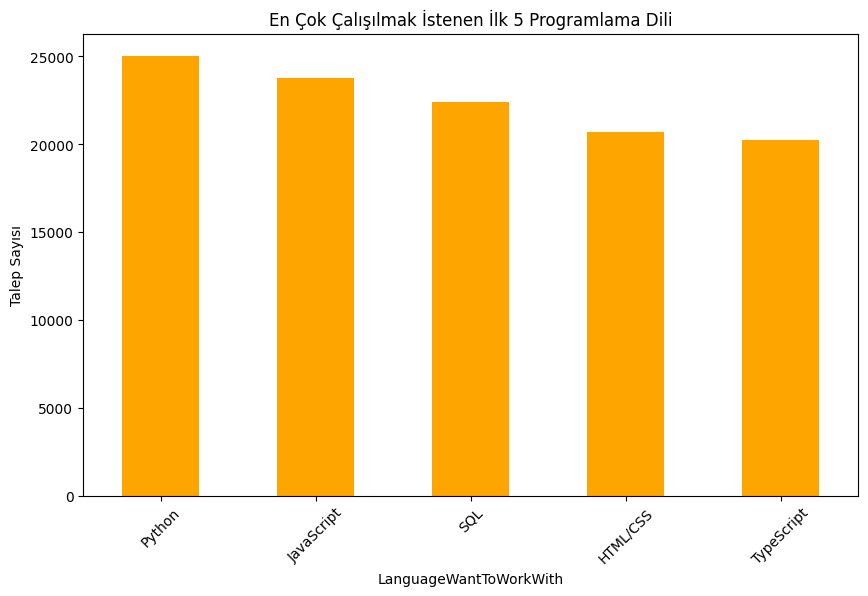

In [42]:
# SQL ile veriyi alıp Pandas ile patlatalım (Explode)
query_lang = "SELECT LanguageWantToWorkWith FROM survey_table WHERE LanguageWantToWorkWith IS NOT NULL"
df_lang = pd.read_sql_query(query_lang, conn)

# Dilleri ayır ve say
df_lang_exploded = df_lang['LanguageWantToWorkWith'].str.split(';').explode()
top_5_langs = df_lang_exploded.value_counts().head(5)

plt.figure(figsize=(10, 6))
top_5_langs.plot(kind='bar', color='orange')
plt.title('En Çok Çalışılmak İstenen İlk 5 Programlama Dili')
plt.ylabel('Talep Sayısı')
plt.xticks(rotation=45)
plt.show()

***3. Yaş Gruplarına Göre JobSatPoints_6 ve JobSatPoints_7 Ortanca Değerlerinin Yığılı Çubuk Grafiği***

Farklı yaş gruplarındaki iş memnuniyeti metriklerini yığılı çubuk grafik ile karşılaştırın.

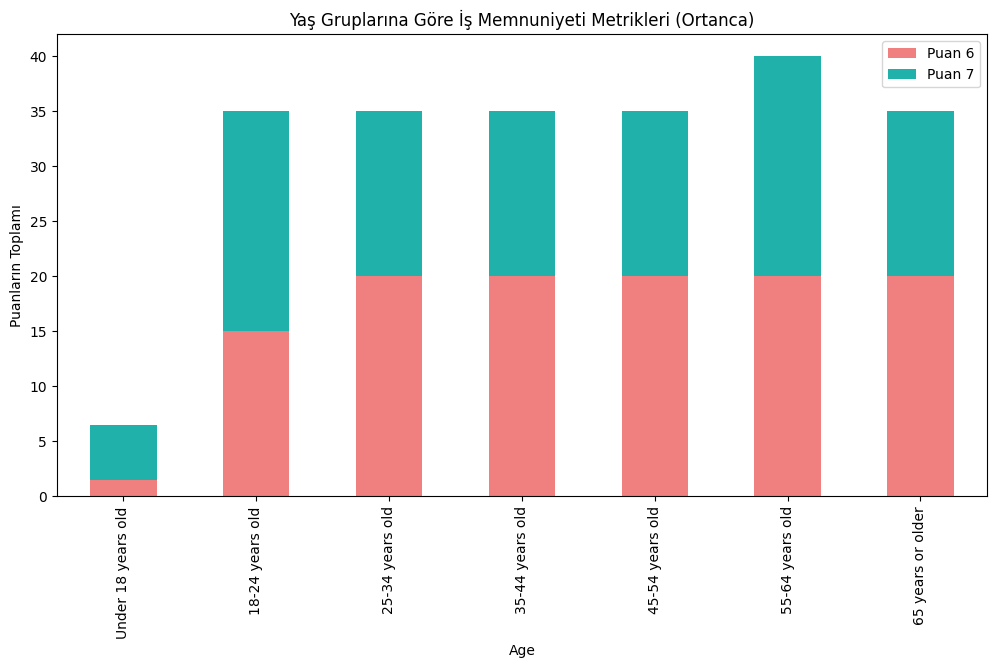

In [43]:
# SQL ile yaş ve memnuniyet verilerini çek
query_sat = "SELECT Age, JobSatPoints_6, JobSatPoints_7 FROM survey_table WHERE Age IS NOT NULL"
df_sat = pd.read_sql_query(query_sat, conn)

# Ortancaları hesapla
df_sat_grouped = df_sat.groupby('Age').median().fillna(0)

# Yaş sırasını düzenleyelim
age_order = ['Under 18 years old', '18-24 years old', '25-34 years old', '35-44 years old', '45-54 years old', '55-64 years old', '65 years or older']
df_sat_grouped = df_sat_grouped.reindex(age_order).dropna()

# Yığılı (Stacked) Grafik
df_sat_grouped.plot(kind='bar', stacked=True, figsize=(12, 6), color=['lightcoral', 'lightseagreen'])
plt.title('Yaş Gruplarına Göre İş Memnuniyeti Metrikleri (Ortanca)')
plt.ylabel('Puanların Toplamı')
plt.legend(['Puan 6', 'Puan 7'])
plt.show()

***4. Veritabanı Popülerliğinin Çubuk Grafiği (DatabaseHaveWorkedWith)***

DatabaseHaveWorkedWith grafiğini kullanarak katılımcılar arasında en sık kullanılan veritabanlarını belirleyin.

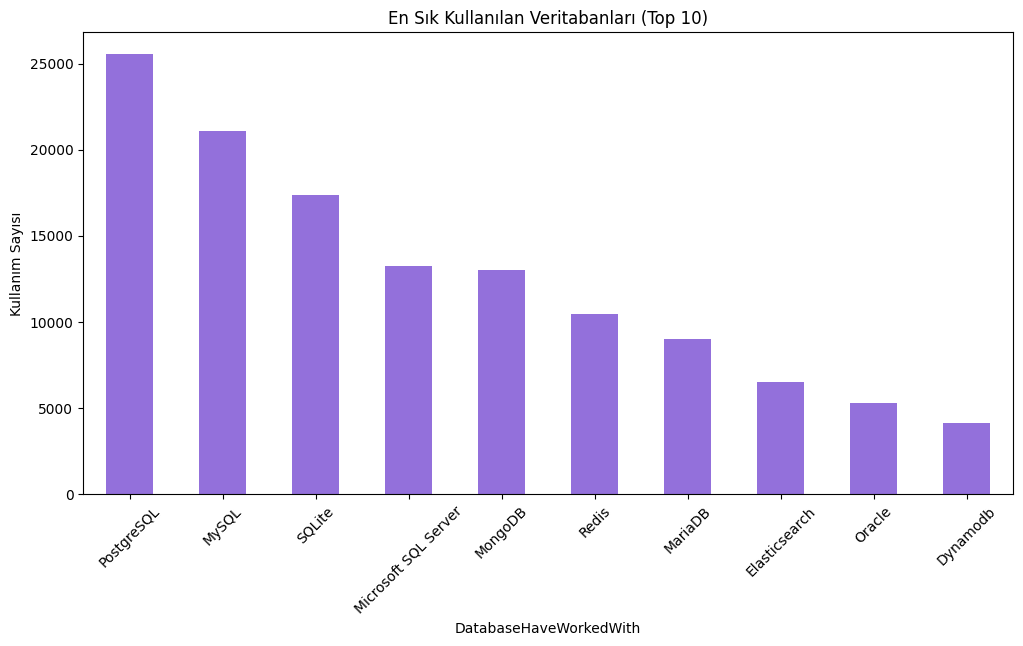

In [44]:
# SQL ile veritabanı kullanım verilerini çek
query_db = "SELECT DatabaseHaveWorkedWith FROM survey_table WHERE DatabaseHaveWorkedWith IS NOT NULL"
df_db = pd.read_sql_query(query_db, conn)

# Veritabanlarını ayır ve say
df_db_exploded = df_db['DatabaseHaveWorkedWith'].str.split(';').explode()
top_db_counts = df_db_exploded.value_counts().head(10) # En popüler 10'u görelim

plt.figure(figsize=(12, 6))
top_db_counts.plot(kind='bar', color='mediumpurple')
plt.title('En Sık Kullanılan Veritabanları (Top 10)')
plt.ylabel('Kullanım Sayısı')
plt.xticks(rotation=45)
plt.show()

## Görev 4: Verilerin Çubuk Grafiklerle Karşılaştırılmasının Görselleştirilmesi*
***1. Farklı Yaş Grupları İçin Ortanca Yıllık Ücretin Gruplandırılmış Çubuk Grafiği***

Birden fazla yaş grubu için ortanca ücreti gruplandırılmış bir çubuk grafikle karşılaştırın.

In [50]:
# 1. SQL ile temizlenmiş ücret ve yaş verisini çek
# Verideki 10.000$ altı ve 300.000$ üstü uç değerleri filtreliyoruz
query_med_comp = """
SELECT Age, ConvertedCompYearly 
FROM survey_table 
WHERE Age IS NOT NULL 
  AND ConvertedCompYearly BETWEEN 10000 AND 300000
"""
df_med = pd.read_sql_query(query_med_comp, conn)

# 2. Yaş gruplarına göre Ortanca (Median) hesapla
df_med_grouped = df_med.groupby('Age')['ConvertedCompYearly'].median().reset_index()

# 3. Yaş sıralamasını düzenle
age_order = ['Under 18 years old', '18-24 years old', '25-34 years old', 
             '35-44 years old', '45-54 years old', '55-64 years old', '65 years or older']
df_med_grouped['Age'] = pd.Categorical(df_med_grouped['Age'], categories=age_order, ordered=True)
df_med_grouped = df_med_grouped.sort_values('Age')

# 4. Görselleştirme
plt.figure(figsize=(12, 6))
sns.barplot(x='Age', y='ConvertedCompYearly', data=df_med_grouped, palette='coolwarm')

plt.title('Yaş Gruplarına Göre Ortanca Yıllık Ücret Karşılaştırması', fontsize=14)
plt.ylabel('Ortanca Ücret (USD)')
plt.xlabel('Yaş Grubu')
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()

ProgrammingError: Cannot operate on a closed database.

***2. Ülkelere Göre Katılımcı Sayısının Çubuk Grafiği***

Hangi bölgelerin en çok temsil edildiğini görmek için katılımcıların ülkelere göre dağılımını gösterin.

/tmp/ipykernel_2335/267066104.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Katilimci_Sayisi', y='Country', data=df_country, palette='viridis')


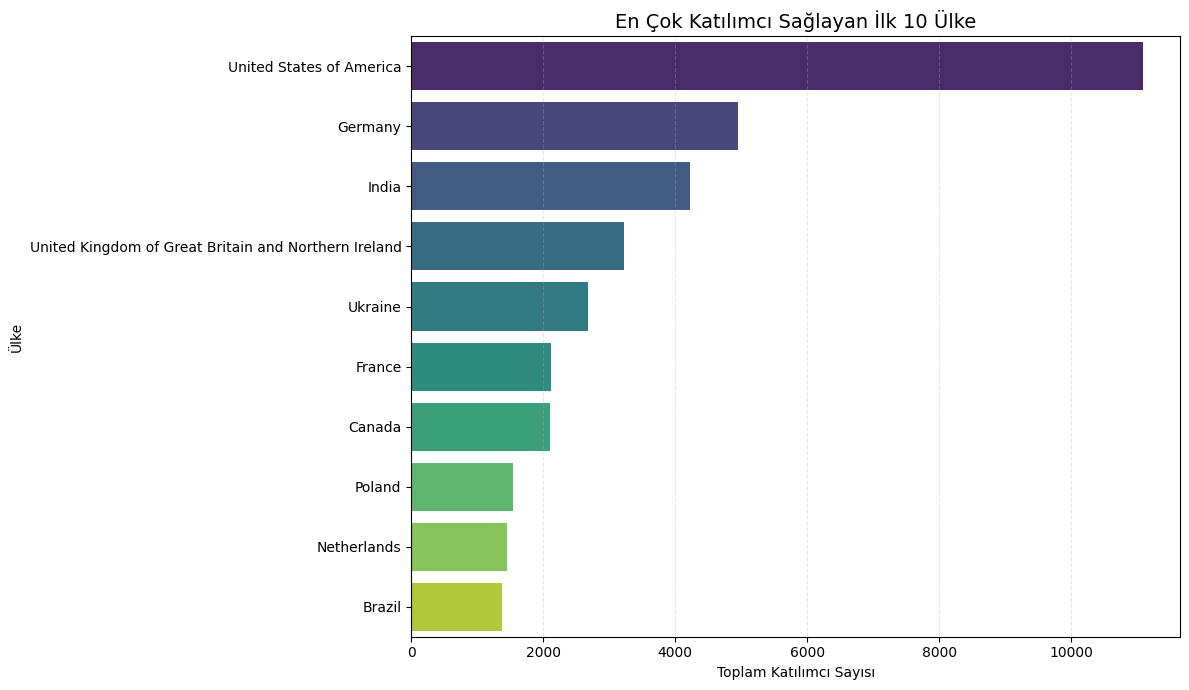

In [49]:
# 1. SQL Sorgusu: Ülkelere göre sayım yap ve en üstteki 10 ülkeyi getir
query_country = """
SELECT Country, COUNT(*) as Katilimci_Sayisi
FROM survey_table
WHERE Country IS NOT NULL
GROUP BY Country
ORDER BY Katilimci_Sayisi DESC
LIMIT 10
"""
df_country = pd.read_sql_query(query_country, conn)

# 2. Görselleştirme (Yatay çubuk grafik ülke isimleri için daha iyidir)
plt.figure(figsize=(12, 7))
sns.barplot(x='Katilimci_Sayisi', y='Country', data=df_country, palette='viridis')

plt.title('En Çok Katılımcı Sağlayan İlk 10 Ülke', fontsize=14)
plt.xlabel('Toplam Katılımcı Sayısı')
plt.ylabel('Ülke')
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# Tüm işlemler bittikten sonra bağlantıyı kapatmayı unutma
conn.close()

## Son Adım: Gözden Geçirme

Bu laboratuvar çalışması, Stack Overflow veri setindeki kategorik verilerin (ana meslek dalları, programlama dili tercihleri ​​ve yaş gruplarına göre ücretlendirme dahil) bileşimini, karşılaştırmasını ve dağılımını analiz etmenizi sağlayan farklı türde çubuk grafiklerin nasıl oluşturulacağını ve yorumlanacağını göstermektedir. Çubuk grafikler, çeşitli kategorilerdeki sayıları ve medyan değerleri etkili bir şekilde karşılaştırır.

Özet
Bu laboratuvar çalışmasını tamamladıktan sonra şunları yapabileceksiniz:

Katılımcıların birincil rollerinin dağılımını görselleştirmek ve mesleki odaklarını anlamaya yardımcı olmak için yatay bir çubuk grafik oluşturmak.
LanguageWantToWorkWith değişkenine dayanarak en çok istenen programlama dillerini belirlemek için dikey bir çubuk grafik geliştirmek.
Farklı yaş grupları arasında iş memnuniyeti metriklerini karşılaştırmak için yığılmış bir çubuk grafik kullanmak.
DatabaseHaveWorkedWith değişkenini kullanarak katılımcılar arasında en sık kullanılan veritabanlarını görselleştirmek için bir çubuk grafik oluşturmak.